In [1]:
import pandas as pd

from sklearn.mixture import GaussianMixture

import numpy as np
np.set_printoptions(precision=6)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.stats import multivariate_normal

In [2]:
data = pd.read_csv('for_tus.csv')
data.head()

,Name (Season),Age,OVR,POT
0,Kevin Love (2020),31,65,65
1,Kevin Love (2021),32,65,65
2,Kevin Love (2022),33,64,64
3,Kevin Love (2023),34,65,65
4,Kevin Love (2024),35,65,65


In [3]:
data_np = data.to_numpy()
print(data_np.shape)

(13962, 4)


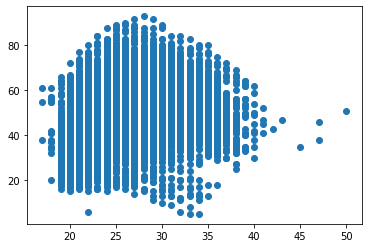

In [4]:
# visualize all players
plt.scatter(data_np[:,1], data_np[:,2])

In [5]:
# ignore, this is just my curiosity
old = data_np[data_np[:,1] >= 40]
print(old)

[['Jusuf Nurkic (2036)' 41 41 41]
 ['Vince Carter (2020)' 43 47 47]
 ['Jamal Crawford Sr. (2020)' 40 54 54]
 ['Jamal Crawford Sr. (2021)' 41 47 47]
 ['Pau Gasol (2021)' 40 49 49]
 ['Luka Doncic (2039)' 40 50 50]
 ['Luka Doncic (2040)' 41 45 45]
 ['Jon Leuer (2036)' 47 38 38]
 ['Marc Gasol (2025)' 40 42 42]
 ['Zach Randolph (2022)' 40 45 45]
 ['LeBron James (2025)' 40 59 59]
 ['LeBron James (2026)' 41 52 56]
 ['LeBron James (2027)' 42 43 43]
 ['Udonis Haslem Sr. (2020)' 40 35 35]
 ['Marco Belinelli Sr. (2036)' 50 51 51]
 ['Travis Wear (2036)' 45 35 35]
 ['Bojan Bogdanovic (2036)' 47 46 46]
 ['Nikola Jokic (2035)' 40 38 38]
 ['DeAndre Ayton (2039)' 40 50 50]
 ['Jamal Murray (2037)' 40 30 30]
 ['Damien Wilkins Sr. (2020)' 40 41 41]
 ['Jalen Smith (2040)' 40 62 62]]


In [6]:
# ignore, this is just my curiosity
good = data_np[data_np[:, 2] >= 75]
print(good)

[['Myles Turner (2027)' 31 75 75]
 ['Jaxson Hayes (2025)' 25 78 79]
 ['Jaxson Hayes (2026)' 26 77 78]
 ['Jaxson Hayes (2027)' 27 78 80]
 ['Jaxson Hayes (2028)' 28 76 76]
 ['R.J. Barrett (2024)' 23 77 83]
 ['R.J. Barrett (2025)' 24 82 86]
 ['R.J. Barrett (2026)' 25 85 87]
 ['R.J. Barrett (2026)' 25 83 85]
 ['R.J. Barrett (2027)' 26 87 88]
 ['R.J. Barrett (2028)' 27 86 87]
 ['R.J. Barrett (2029)' 28 83 84]
 ['R.J. Barrett (2030)' 29 85 85]
 ['R.J. Barrett (2031)' 30 83 83]
 ['R.J. Barrett (2032)' 31 81 81]
 ['R.J. Barrett (2033)' 32 82 82]
 ['R.J. Barrett (2034)' 33 79 79]
 ['R.J. Barrett (2035)' 34 79 79]
 ['R.J. Barrett (2036)' 35 76 76]
 ['Joel Embiid (2021)' 27 75 77]
 ['Romeo Langford (2028)' 28 76 76]
 ['Romeo Langford (2029)' 29 77 77]
 ['Stephen Curry (2020)' 32 76 76]
 ['Stephen Curry (2021)' 33 76 76]
 ['Stephen Curry (2022)' 34 76 76]
 ['Stephen Curry (2023)' 35 76 76]
 ['James Harden (2020)' 30 76 76]
 ['Luka Doncic (2022)' 23 80 84]
 ['Luka Doncic (2023)' 24 79 83]
 ['Luka D

[['Jaxson Hayes (2036)' 36 52 52]
 ['R.J. Barrett (2036)' 35 76 76]
 ['Jusuf Nurkic (2036)' 41 41 41]
 ...
 ['Ryan Ewing (2036)' 22 25 37]
 ['TyQuan Wilson (2036)' 22 23 33]
 ['Ruslan Howard (2036)' 22 27 40]]


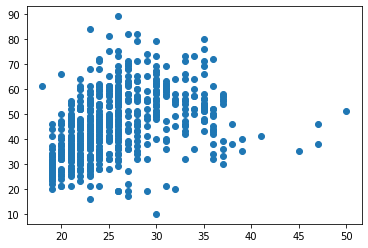

In [7]:
# ignore, this is just my curiosity
players_2036 = np.array([dp for dp in data_np if dp[0][-3:] == '36)'])
print(players_2036)
plt.scatter(players_2036[:,1], players_2036[:,2])


In [8]:
# we will fit the gaussian on great players in their prime
# (that is, age in [23, 28] and ovr >= 70)
subset = data_np[data_np[:,1] >= 23]
subset = subset[subset[:,1] <= 28]
subset = subset[subset[:,2] >= 75]
print(subset.shape)

(156, 4)


In [9]:
# fit the Gaussian on those players
# use a diagonal covariance matrix (i.e. no cross-correlation terms) for simplicity
# the model performs similarly with & without those terms (i checked) so we can ignore them
gm = GaussianMixture(n_components=1, covariance_type='diag', max_iter=200, n_init=3, verbose=0)
X = np.array([subset[:,1], subset[:,2]]).T
gm.fit(X)

GaussianMixture(covariance_type='diag', init_params='kmeans', max_iter=200,
                means_init=None, n_components=1, n_init=3, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

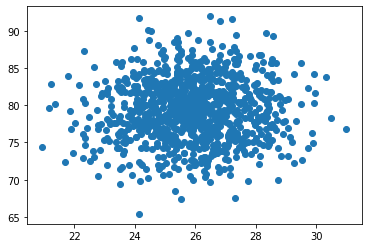

In [10]:
# plot samples from the Gaussian to check that it makes sense
samples, labels = gm.sample(n_samples=1000)
plt.scatter(samples[:,0], samples[:,1])

In [11]:
# print the means and stdevs of the gaussians
print(gm.means_, np.sqrt(gm.covariances_))

[[25.955128 79.384615]] [[1.524766 4.125377]]


In [12]:
# see latex thing for derivation of this function
def get_desired_years(age, ovr):
    a = 278603
    b = -8.10721
    mu_age = 25.955128
    mu_ovr = 79.384615
    sigma_age = 1.524766
    sigma_ovr = 4.125377
    
    normalization = 1 / (2 * np.pi * sigma_age * sigma_ovr)
    exponent = -.5 * ((((age - mu_age) / sigma_age) ** 2) + (((ovr - mu_ovr) / sigma_ovr) ** 2))
    years = ((np.log(normalization) + exponent) / b) - np.log(a) / b
    
    if years < 2:
        years = 2
    elif years > 5:
        years = 5
    return years

In [13]:
# compute desired_years for selected age-OVR pairs
print('Columns are OVRs from 70 to 100 by 5s, rows are ages from 21 to 35.')
print('Each entry is the desired contract length at that age and OVR.\n')

results_matrix = np.ones((14, 7))
for x_age in range(21, 35):
    for x_ovr in range(70, 101, 5):
        age_idx = x_age - 21
        ovr_idx = int((x_ovr - 70) / 5)
        results_matrix[age_idx, ovr_idx] = get_desired_years(x_age, x_ovr)
        
print(results_matrix)


Columns are OVRs from 70 to 100 by 5s, rows are ages from 21 to 35.
Each entry is the desired contract length at that age and OVR.

[[2.970488 2.720999 2.652703 2.765601 3.059691 3.534974 4.19145 ]
 [2.734123 2.484635 2.416339 2.529236 2.823326 3.298609 3.955085]
 [2.550813 2.301325 2.233029 2.345926 2.640016 3.115299 3.771775]
 [2.420558 2.171069 2.102773 2.21567  2.509761 2.985044 3.64152 ]
 [2.343357 2.093868 2.025572 2.138469 2.432559 2.907843 3.564319]
 [2.31921  2.069721 2.001426 2.114323 2.408413 2.883696 3.540172]
 [2.348118 2.098629 2.030333 2.143231 2.437321 2.912604 3.56908 ]
 [2.43008  2.180592 2.112296 2.225193 2.519283 2.994566 3.651042]
 [2.565097 2.315609 2.247313 2.36021  2.6543   3.129583 3.786059]
 [2.753169 2.50368  2.435384 2.548281 2.842371 3.317655 3.974131]
 [2.994295 2.744806 2.67651  2.789407 3.083497 3.55878  4.215256]
 [3.288475 3.038986 2.97069  3.083588 3.377678 3.852961 4.509437]
 [3.63571  3.386221 3.317925 3.430822 3.724913 4.200196 4.856672]
 [4.035999

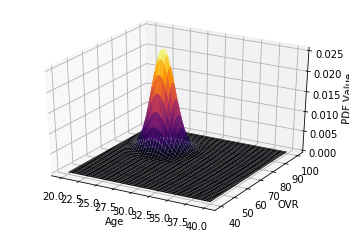

In [14]:
#Parameters to set
mu_x = gm.means_[0,0] 
variance_x = gm.covariances_[0,0]

mu_y = gm.means_[0,1] 
variance_y = gm.covariances_[0,1]

#Create grid and multivariate normal
x = np.linspace(20,40,100)
y = np.linspace(40,100,100)
X, Y = np.meshgrid(x,y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
rv = multivariate_normal([mu_x, mu_y], [[variance_x, 0], [0, variance_y]])

#Make a 3D plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, rv.pdf(pos),cmap='inferno',linewidth=0)
ax.set_xlabel('Age')
ax.set_ylabel('OVR')
ax.set_zlabel('PDF Value')
plt.show()


In [15]:
# testing on actual players
# x_age = 25.955
# x_ovr = 79.385
ages = [30, 23, 29, 26, 27, 34, 30, 32, 28, 30]
ovrs = [89, 80, 74, 72, 72, 68, 68, 68, 67, 66]

for i in range(len(ages)):
    age = ages[i]
    ovr = ovrs[i]
    print(get_desired_years(age, ovr))

2.7690579968772626
2.23302882339504
2.3510108943726693
2.1976714655570864
2.2265793739401674
4.1865287461631615
2.9036982394500224
3.4390045043356086
2.666746290424025
3.08321863535755
